# Imports

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as reader
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random
random.seed(27484)

In [2]:
gold = reader.get_data_yahoo('GC=F','12/1/2012',interval='d')
gold

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,1721.900024,1714.500000,1714.900024,1719.599976,1238.0,1719.599976
2012-12-04,1716.800049,1691.599976,1716.300049,1694.400024,1428.0,1694.400024
2012-12-05,1706.000000,1685.000000,1697.099976,1692.400024,1262.0,1692.400024
2012-12-06,1702.099976,1686.400024,1694.300049,1700.300049,525.0,1700.300049
2012-12-07,1704.500000,1684.000000,1701.199951,1704.000000,169.0,1704.000000
...,...,...,...,...,...,...
2022-05-16,1813.500000,1787.000000,1790.500000,1813.500000,34.0,1813.500000
2022-05-17,1828.599976,1816.699951,1824.900024,1818.199951,121.0,1818.199951
2022-05-18,1819.699951,1805.000000,1815.000000,1815.900024,311.0,1815.900024


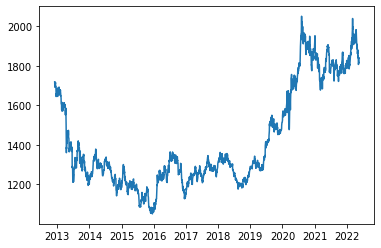

In [3]:
plt.plot(gold['Adj Close'])

графік значень котрі потрібно буде передбачити

In [4]:
returns = gold['Adj Close'].pct_change()
column_names = gold.columns
x = gold.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5
0,0.653366,0.672469,0.661266,0.668332,0.003204,0.668332
1,0.648317,0.649426,0.662666,0.643150,0.003696,0.643150
2,0.637624,0.642785,0.643464,0.641151,0.003267,0.641151
3,0.633762,0.644194,0.640664,0.649046,0.001359,0.649046
4,0.636139,0.641779,0.647565,0.652743,0.000437,0.652743
...,...,...,...,...,...,...
2377,0.744059,0.745422,0.736874,0.762166,0.000088,0.762166
2378,0.759010,0.775307,0.771277,0.766863,0.000313,0.766863
2379,0.750198,0.763534,0.761376,0.764565,0.000805,0.764565
2380,0.771485,0.769269,0.757276,0.789847,0.000805,0.789847


In [5]:
pct_c_gold = df
pct_c_gold.columns = column_names
pct_c_gold

,High,Low,Open,Close,Volume,Adj Close
0,0.653366,0.672469,0.661266,0.668332,0.003204,0.668332
1,0.648317,0.649426,0.662666,0.643150,0.003696,0.643150
2,0.637624,0.642785,0.643464,0.641151,0.003267,0.641151
3,0.633762,0.644194,0.640664,0.649046,0.001359,0.649046
4,0.636139,0.641779,0.647565,0.652743,0.000437,0.652743
...,...,...,...,...,...,...
2377,0.744059,0.745422,0.736874,0.762166,0.000088,0.762166
2378,0.759010,0.775307,0.771277,0.766863,0.000313,0.766863
2379,0.750198,0.763534,0.761376,0.764565,0.000805,0.764565
2380,0.771485,0.769269,0.757276,0.789847,0.000805,0.789847


In [6]:
returns

Date
2012-12-03         NaN
2012-12-04   -0.014655
2012-12-05   -0.001180
2012-12-06    0.004668
2012-12-07    0.002176
                ...   
2022-05-16    0.003375
2022-05-17    0.002592
2022-05-18   -0.001265
2022-05-19    0.013932
2022-05-20   -0.000054
Name: Adj Close, Length: 2382, dtype: float64

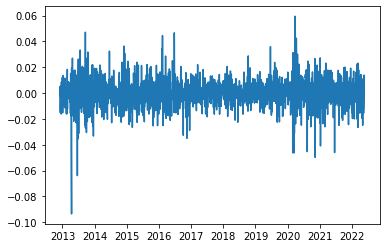

In [7]:
plt.plot(returns)

<AxesSubplot:>

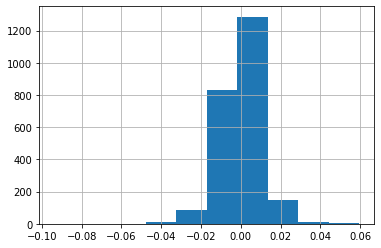

In [8]:
returns.hist()

In [9]:
npa = returns.values[1:].reshape(-1,1)
scale = MinMaxScaler(feature_range=(0,1)) 
npa = scale.fit_transform(npa)
print(len(npa))

2381


In [10]:
samples = 10 
steps = 1 
X = []
Y = []
for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples])
    Y.append(npa[i+samples][0])
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0.51552762],
       [0.60358593],
       [0.64180654],
       [0.62552124],
       [0.64581759],
       [0.59298711],
       [0.6434373 ],
       [0.53135004],
       [0.61207111],
       [0.61592439]])]
Testing Data: Length is  1 :  [0.5053944174387908]


In [11]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9 * X.shape[0])
print('Threshold is', threshold)

Dimensions of X (2371, 10, 1) Dimensions of Y (2371,)
Threshold is 2134


# Функція для створення RNN з певною будовою

In [12]:
def create_model_3(num):
    model = keras.Sequential()

    model.add(layers.SimpleRNN(num,
                               activation = 'relu',
                               use_bias=True,
                               input_shape=(X.shape[1], X.shape[2])))
    model.add(layers.Dropout(rate=0.2))

    model.add(layers.Dense(1))

    model.compile(loss='mean_squared_error', optimizer = 'adam')
    
    return model


# Створимо RNN із 3 нейронами

In [13]:
rnn_3_layer = create_model_3(3)
rnn_3_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [14]:
def start_history_3(n,model):
    history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle = False, # Since this is time series data
                    epochs=n,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)
    plt.plot(history.history['loss'], label = 'training loss')
    plt.plot(history.history['val_loss'], label ='validation loss')
    plt.legend()
    plt.show()
    
    true_Y = Y[threshold:]
    pred_Y = []
    print('Number of Forecasts to do: ',Y.shape[0] - round(Y.shape[0]*0.9))
    latest_input = X[threshold-1:threshold]
    for i in range(Y.shape[0] - round(Y.shape[0]*0.9) ):
        p = model.predict(latest_input.reshape(1,X.shape[1],1))[0,0]

        pred_Y.append(p)
        latest_input = np.append(X[threshold][1:], p)
    
    
    plt.plot(true_Y, label = 'True Value')
    plt.plot(pred_Y, label = 'Forecasted Value')
    plt.legend()
    
    return model

Epoch 1/10
54/54 [==============================] - 4s 26ms/step - loss: 0.3021 - val_loss: 0.2627
Epoch 2/10
54/54 [==============================] - 1s 12ms/step - loss: 0.2161 - val_loss: 0.1804
Epoch 3/10
54/54 [==============================] - 1s 10ms/step - loss: 0.1462 - val_loss: 0.1136
Epoch 4/10
54/54 [==============================] - 1s 11ms/step - loss: 0.0921 - val_loss: 0.0660
Epoch 5/10
54/54 [==============================] - 1s 11ms/step - loss: 0.0564 - val_loss: 0.0368
Epoch 6/10
54/54 [==============================] - 1s 11ms/step - loss: 0.0390 - val_loss: 0.0217
Epoch 7/10
54/54 [==============================] - 1s 10ms/step - loss: 0.0331 - val_loss: 0.0148
Epoch 8/10
54/54 [==============================] - 1s 11ms/step - loss: 0.0297 - val_loss: 0.0091
Epoch 9/10
54/54 [==============================] - 1s 12ms/step - loss: 0.0252 - val_loss: 0.0083
Epoch 10/10
54/54 [==============================] - 1s 12ms/step - loss: 0.0226 - val_loss: 0.0086


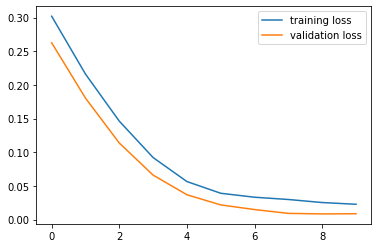

Number of Forecasts to do:  237


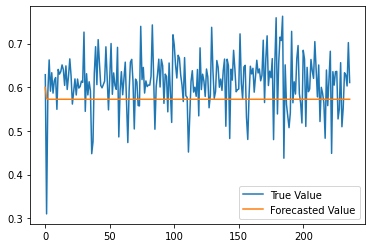

In [15]:
model_for_10_epochs_3 = start_history_3(10,rnn_3_layer)

Epoch 1/40
54/54 [==============================] - 1s 12ms/step - loss: 0.0203 - val_loss: 0.0084
Epoch 2/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0184 - val_loss: 0.0081
Epoch 3/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0171 - val_loss: 0.0080
Epoch 4/40
54/54 [==============================] - 1s 13ms/step - loss: 0.0157 - val_loss: 0.0079
Epoch 5/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0158 - val_loss: 0.0076
Epoch 6/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0150 - val_loss: 0.0075
Epoch 7/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0149 - val_loss: 0.0073
Epoch 8/40
54/54 [==============================] - 1s 10ms/step - loss: 0.0130 - val_loss: 0.0075
Epoch 9/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0135 - val_loss: 0.0073
Epoch 10/40
54/54 [==============================] - 1s 11ms/step - loss: 0.0121 - val_loss: 0.0071
Epoch 11/

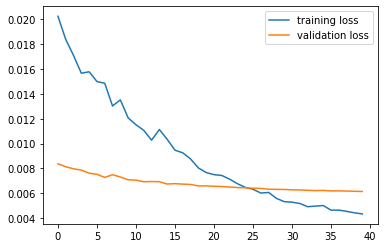

Number of Forecasts to do:  237


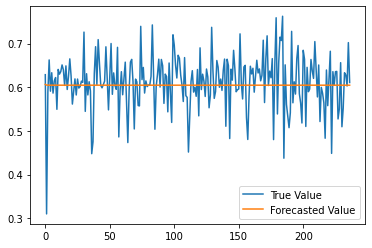

In [16]:
model_for_40_epochs_3 = start_history_3(40,rnn_3_layer)

Epoch 1/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 2/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0043 - val_loss: 0.0061
Epoch 3/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0043 - val_loss: 0.0061
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0042 - val_loss: 0.0061
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0041 - val_loss: 0.0061
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0040 - val_loss: 0.0061
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0041 - val_loss: 0.0061
Epoch 8/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0041 - val_loss: 0.0061
Epoch 9/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0039 - val_loss: 0.0061
Epoch 10/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0040 - val_loss: 0.0061

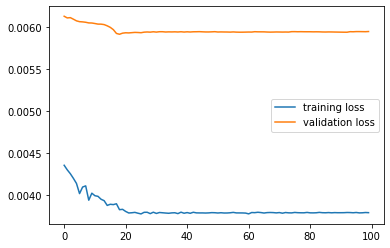

Number of Forecasts to do:  237


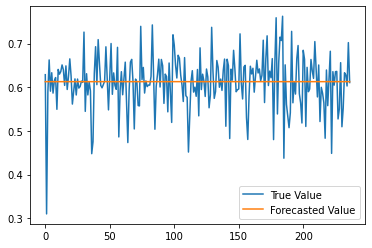

In [17]:
model_for_100_epochs_3 = start_history_3(100,rnn_3_layer)

як видно із графіків 3 нейронів не достатньо для точного результату, оскільки існує дуже багато змінних від котрих залежить значення

# Розподіл даних

In [18]:
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(pct_c_gold.shape[0] - samples):
    X.append(pct_c_gold.iloc[i:i+samples, 0:5].values) # Independent Samples
    Y.append(pct_c_gold.iloc[i+samples, 5:].values) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[6.53366361e-01, 6.72469326e-01, 6.61266103e-01, 6.68332127e-01,
        3.20448110e-03],
       [6.48316880e-01, 6.49426437e-01, 6.62666267e-01, 6.43149802e-01,
        3.69628353e-03],
       [6.37623762e-01, 6.42785286e-01, 6.43464277e-01, 6.41151201e-01,
        3.26660351e-03],
       [6.33762352e-01, 6.44194045e-01, 6.40664070e-01, 6.49045700e-01,
        1.35892777e-03],
       [6.36138614e-01, 6.41779048e-01, 6.47564662e-01, 6.52743063e-01,
        4.37445319e-04],
       [6.48514851e-01, 6.62105019e-01, 6.50564961e-01, 6.61736768e-01,
        2.27782178e-04],
       [6.45643540e-01, 6.63815698e-01, 6.56365589e-01, 6.56940076e-01,
        2.27782178e-04],
       [6.53762425e-01, 6.65928775e-01, 6.56465575e-01, 6.65334225e-01,
        5.04744599e-04],
       [6.38811833e-01, 6.47715880e-01, 6.53565261e-01, 6.44348914e-01,
        6.21224122e-04],
       [6.30891041e-01, 6.52243954e-01, 6.44664470e-01, 6.44548847e-01,
        1.86367237e-04

In [19]:
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (2372, 10, 5) Dimensions of Y (2372, 1)


In [20]:
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)

Training Length (2135, 10, 5) (2135, 1) Testing Length: (237, 10, 5) (237, 1)


# Функція для створення RNN

In [21]:
def create_model_30(num):
    model = keras.Sequential()

    model.add(layers.SimpleRNN(num,
                               activation = 'tanh',
                               use_bias=True,
                               input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(layers.Dropout(rate=0.2))

    model.add(layers.Dense(1))

    model.compile(loss='mean_squared_error', optimizer = 'adam')
    
    return model

# Створимо RNN із 30 нейронами

In [22]:
rnn_30_layer = create_model_30(30)
rnn_30_layer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 30)                1080      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [27]:
def start_history_30(n,model):
    history = model.fit(trainX,
                    trainY,
                    shuffle = False, 
                    epochs=n,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) 
    
    plt.plot(history.history['loss'], label = 'training loss')
    plt.plot(history.history['val_loss'], label ='validation loss')
    plt.legend()
    plt.show()
    
    y_pred = model.predict(testX)
    plt.plot(testY, label = 'True Value')
    plt.plot(y_pred, label = 'Forecasted Value')
    plt.legend()
    plt.show()

Epoch 1/10
54/54 [==============================] - 1s 14ms/step - loss: 3.6566e-04 - val_loss: 5.3844e-04
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 3.4190e-04 - val_loss: 5.2397e-04
Epoch 3/10
54/54 [==============================] - 1s 16ms/step - loss: 3.3894e-04 - val_loss: 6.0261e-04
Epoch 4/10
54/54 [==============================] - 1s 26ms/step - loss: 3.4343e-04 - val_loss: 6.4053e-04
Epoch 5/10
54/54 [==============================] - 1s 17ms/step - loss: 3.2738e-04 - val_loss: 5.4607e-04
Epoch 6/10
54/54 [==============================] - 1s 13ms/step - loss: 3.3570e-04 - val_loss: 5.4248e-04
Epoch 7/10
54/54 [==============================] - 1s 16ms/step - loss: 3.6625e-04 - val_loss: 4.8264e-04
Epoch 8/10
54/54 [==============================] - 1s 13ms/step - loss: 4.4558e-04 - val_loss: 5.4951e-04
Epoch 9/10
54/54 [==============================] - 1s 15ms/step - loss: 3.4677e-04 - val_loss: 7.0929e-04
Epoch 10/10
54/54 [==================

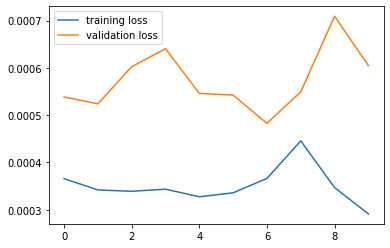

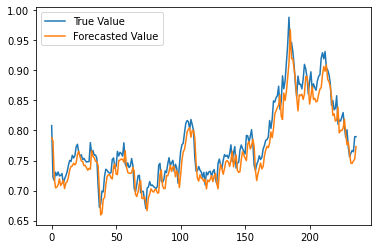

In [28]:
model_for_10_epochs_30 = start_history_30(10,rnn_30_layer)

Epoch 1/40
54/54 [==============================] - 1s 15ms/step - loss: 3.2712e-04 - val_loss: 5.8794e-04
Epoch 2/40
54/54 [==============================] - 1s 13ms/step - loss: 3.0015e-04 - val_loss: 6.0062e-04
Epoch 3/40
54/54 [==============================] - 1s 12ms/step - loss: 3.0764e-04 - val_loss: 5.5890e-04
Epoch 4/40
54/54 [==============================] - 1s 15ms/step - loss: 3.4551e-04 - val_loss: 4.7371e-04
Epoch 5/40
54/54 [==============================] - 1s 12ms/step - loss: 2.9079e-04 - val_loss: 5.1287e-04
Epoch 6/40
54/54 [==============================] - 1s 13ms/step - loss: 3.3147e-04 - val_loss: 5.3435e-04
Epoch 7/40
54/54 [==============================] - 1s 15ms/step - loss: 3.5419e-04 - val_loss: 4.9190e-04
Epoch 8/40
54/54 [==============================] - 1s 14ms/step - loss: 3.2924e-04 - val_loss: 5.7920e-04
Epoch 9/40
54/54 [==============================] - 1s 15ms/step - loss: 3.4059e-04 - val_loss: 5.0118e-04
Epoch 10/40
54/54 [==================

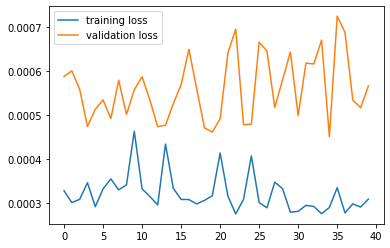

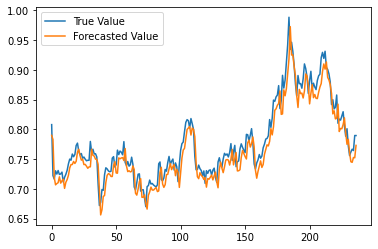

In [29]:
model_for_40_epochs_30 = start_history_30(40,rnn_30_layer)

Epoch 1/100
54/54 [==============================] - 1s 17ms/step - loss: 2.8311e-04 - val_loss: 5.3182e-04
Epoch 2/100
54/54 [==============================] - 1s 14ms/step - loss: 3.1526e-04 - val_loss: 4.9517e-04
Epoch 3/100
54/54 [==============================] - 1s 13ms/step - loss: 3.3747e-04 - val_loss: 5.4188e-04
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 3.0696e-04 - val_loss: 5.2831e-04
Epoch 5/100
54/54 [==============================] - 1s 13ms/step - loss: 3.6036e-04 - val_loss: 7.5204e-04
Epoch 6/100
54/54 [==============================] - 1s 13ms/step - loss: 2.7115e-04 - val_loss: 6.4403e-04
Epoch 7/100
54/54 [==============================] - 1s 13ms/step - loss: 2.8224e-04 - val_loss: 5.1757e-04
Epoch 8/100
54/54 [==============================] - 1s 14ms/step - loss: 2.9309e-04 - val_loss: 4.5718e-04
Epoch 9/100
54/54 [==============================] - 1s 16ms/step - loss: 3.2901e-04 - val_loss: 6.3685e-04
Epoch 10/100
54/54 [========

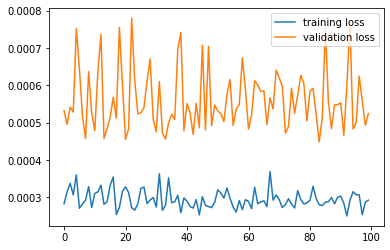

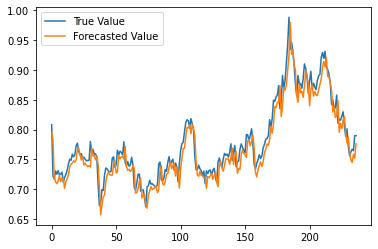

In [30]:
model_for_100_epochs_30 = start_history_30(100,rnn_30_layer)

ці графіки вже виглядають краще ніж для 3 нейронів оскільки в моделі є 30 нейронів і вони тепер можуть "спостерігати" за змінами більшої кількості змінних, і відповідно можуть передбачити значення краще